In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
! pip install -q transformers[sentencepiece] fastai ohmeow-blurr nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
! pip install -q onnxruntime onnx==1.13.1 onnxruntime-gpu onnxruntime_tools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.7/212.7 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 4.1 MB/s eta 0:00:00


In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoConfig
from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *

/usr/local/lib/python3.10/dist-packages/blurr/text/modeling/question_answering.py:31: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  squad_metric = load_metric("squad")


In [ ]:
from tqdm.notebook import tqdm
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Colab Projects/NLP Models

/content/drive/.shortcut-targets-by-id/1ijxO7bmhCZdrDAzQZnE4FZhf032K0Icj/Colab Projects/NLP Models


In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/Colab Projects/NLP Models/data/fiction data cleaned.csv")

In [ ]:
df = df.dropna().reset_index(drop=True)
df.shape

(54117, 4)

In [ ]:
# Create a list of tags from the 'Tags' column
tag_list = df['Tags'].to_list()

# Initialize a dictionary to count tag occurrences
tag_count = {}

# Iterate through each list of tags
for tags in tag_list:
    for tag in tags:
        # Increment tag count if it exists in the dictionary, otherwise initialize it to 1
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

# Print the number of unique tags
print(f"Number of Unique Tags: {len(tag_count)}")

Number of Unique Tags: 51


In [ ]:
threshold = int(len(df) * 0.005)
rare_genres = [key for key, value in tag_count.items() if value < threshold]
len(rare_genres), rare_genres[:5]

In [ ]:
genres_list = df['Tags'].to_list()
genre_count = {}
for genres in genres_list:
  genre_list = eval(genres)
  for genre in genre_list:
    if genre in genre_count.keys():
      genre_count[genre] += 1
    else:
      genre_count[genre] = 1
print(f"Number of Genres: {len(genre_count)}")
print(genre_count)

threshold = int(len(df) * 0.005)
rare_genres = [key for key, value in genre_count.items() if value < threshold]
len(rare_genres)

Number of Genres: 103
{'Time Loop': 473, 'Adventure': 46521, 'Fantasy': 44535, 'Mystery': 6415, 'Magic': 25269, 'Romantic Fantasy': 7333, 'Science Fiction': 561, 'Comedy': 39674, 'Action': 36003, 'Thriller': 2919, 'LitRPG': 10869, 'Progression': 8503, 'Super Heroes': 1928, 'Male Lead': 25039, 'Sci-fi': 9638, 'Low Fantasy': 5226, 'School Life': 5323, 'Slice of Life': 7501, 'War Epic': 1653, 'Superhero Adventure': 3134, 'Anti-Hero Lead': 9890, 'Genetically Engineered': 1483, 'Strong Lead': 13337, 'Time Travel': 1343, 'Villainous Lead': 2360, 'Non-Human Lead': 7899, 'Secret Identity': 5196, 'Artificial Intelligence': 1991, 'Technologically Engineered': 1495, 'Urban Fantasy': 4422, 'Female Lead': 11442, 'Drama': 10230, 'Mythos': 4194, 'Soft Sci-fi': 3160, 'Supernatural': 14979, 'Alien Encounter': 380, 'Horror': 7733, 'Reincarnation': 8918, 'Cyberpunk': 1615, 'Dystopia': 1952, 'Cyberpunk Mystery': 74, 'Strategy': 6719, 'GameLit': 5088, 'Portal Fantasy / Isekai': 8596, 'Xianxia': 2507, 'Roma

22

In [ ]:
genres_list = df["Tags"].to_list()
revised_genre_list = []
indices_to_drop = []

for idx, genres in enumerate(genres_list):
  genre_list = eval(genres)
  revised_genres = []

  for genre in genre_list:
    if genre not in rare_genres:
      revised_genres.append(genre)

  if len(revised_genres) == 0:
    indices_to_drop.append(idx)
  else:
    revised_genre_list.append(revised_genres)

df = df.drop(indices_to_drop).reset_index(drop=True)
df['revised_genres'] = revised_genre_list
df.shape

(53860, 5)

In [ ]:
revised_genres_list = df.revised_genres.to_list()
revised_genre_count = {}
for genres in revised_genres_list:
  genre_list = genres
  for genre in genre_list:
    if genre in revised_genre_count.keys():
      revised_genre_count[genre] += 1
    else:
      revised_genre_count[genre] = 1
print(f"Number of Genres: {len(revised_genre_count)}")

Number of Genres: 81


In [ ]:
encode_genre_types = { key: idx for idx, (key, value) in enumerate(revised_genre_count.items())}
with open("genre_types_encoded.json", "w") as fp:
  json.dump(encode_genre_types, fp)

# We need this because for multilabel classification all genres have possibility to be present in the predictions
categorical_genre_list = []
revised_genres_list = df.revised_genres.to_list()

for revised_genres in revised_genres_list:
  categorical_list = [0] * len(encode_genre_types)
  for genre in revised_genres:
    genre_type_index = encode_genre_types[genre]
    categorical_list[genre_type_index] = 1
  categorical_genre_list.append(categorical_list)

df['genre_cat_list'] = categorical_genre_list
df.shape

(53860, 6)

In [ ]:
labels = list(encode_genre_types.keys())
len(labels), labels[:5]

(81, ['Time Loop', 'Adventure', 'Fantasy', 'Mystery', 'Magic'])

# Data Split

In [ ]:
splitter = RandomSplitter(valid_pct=0.1, seed=42)
train_ids, valid_ids = splitter(df)
len(train_ids), len(valid_ids)

(48474, 5386)

In [ ]:
valid_df = df.loc[valid_ids]
valid_df.head()

We will be using `valid_df` for all inference testing

# Fastai & Blurr Inference

In [ ]:
model_path = "story-genre-classifier-v1.pkl"
learner_inf = load_learner(model_path)

In [ ]:
learner_inf.blurr_predict("random placeholder")

In [ ]:
learner_inf.blurr_predict("random placeholder")[0]['labels']

['Adventure', 'Fantasy', 'Action', 'Male Lead']

## Evaluation

In [ ]:
from sklearn import metrics

def metric_measures(test_df, preds):

  targets = [np.asarray(target) for target in test_df['genre_cat_list'].to_list()]
  outputs = [np.asarray(pred) for pred in preds]


  accuracy = metrics.accuracy_score(targets, outputs)
  f1_score_micro = metrics.f1_score(targets, outputs, average='micro')
  f1_score_macro = metrics.f1_score(targets, outputs, average='macro')

  print(f"F1 Score (Micro) = {f1_score_micro}")
  print(f"F1 Score (Macro) = {f1_score_macro}")

  return

In [ ]:
from sklearn.metrics import roc_auc_score

def calculate_roc_auc(test_df, preds):
    targets = [np.asarray(target) for target in test_df['genre_cat_list'].to_list()]
    outputs = [np.asarray(pred) for pred in preds]

    roc_auc_micro = roc_auc_score(targets, outputs, average='micro')
    roc_auc_macro = roc_auc_score(targets, outputs, average='macro')

    print(f"ROC AUC Score (Micro) = {roc_auc_micro}")
    print(f"ROC AUC Score (Macro) = {roc_auc_macro}")

    return

preds = []
for idx, row in tqdm(valid_df.iterrows(), total=len(valid_df)):
    desc = row['Description']
    labels = learner_inf.blurr_predict(desc)[0]['labels']
    pred_genres = [0] * len(encode_genre_types)
    for label in labels:
        pred_genres[encode_genre_types[label]] = 1
    preds.append(pred_genres)

calculate_roc_auc(valid_df, preds)

  0%|          | 0/5386 [00:00<?, ?it/s]

ROC AUC Score (Micro) = 0.7706941363674307
ROC AUC Score (Macro) = 0.7094004824882684


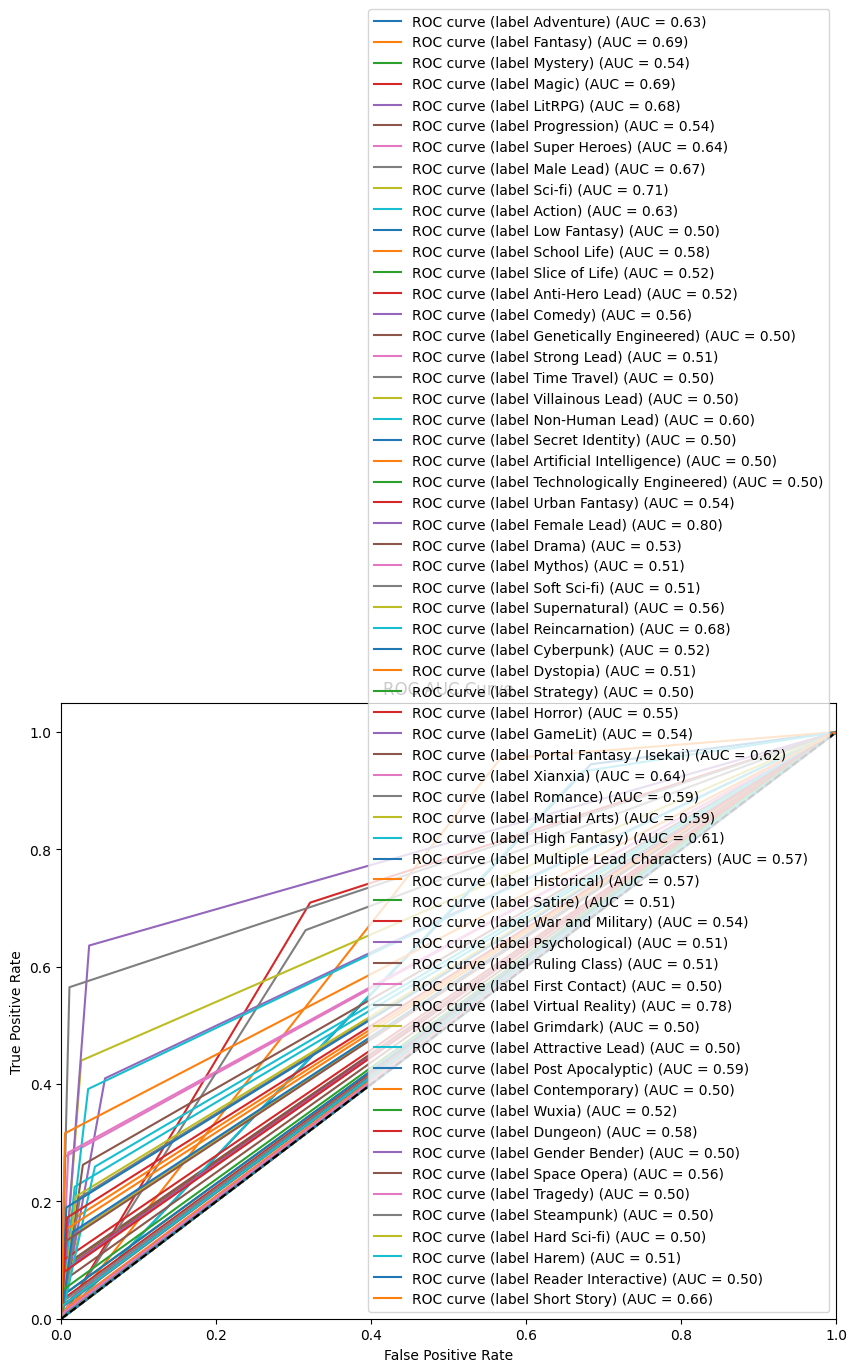

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(test_df, preds, labels):
    targets = np.asarray([np.asarray(target) for target in test_df['genre_cat_list'].to_list()])
    outputs = np.asarray([np.asarray(pred) for pred in preds])

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(len(labels)):
        fpr[i], tpr[i], _ = roc_curve(targets[:, i], outputs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 8))
    for i in range(len(labels)):
        plt.plot(fpr[i], tpr[i], label=f'ROC curve (label {labels[i]}) (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC Curve')
    plt.legend(loc="lower right")
    plt.show()

# List of genre labels
genre_labels = list(encode_genre_types.keys())

# Call the function to plot the ROC AUC curve
plot_roc_curve(valid_df, preds, genre_labels)

In [ ]:
preds = []
for idx, row in tqdm(valid_df.iterrows(), total=len(valid_df)):
  desc = row['Description']
  labels = learner_inf.blurr_predict(desc)[0]['labels']
  pred_genres = [0] * len(encode_genre_types)
  for label in labels:
    pred_genres[encode_genre_types[label]] = 1
  preds.append(pred_genres)

preds[0][:20]

  0%|          | 0/5386 [00:00<?, ?it/s]

[0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

In [ ]:
metric_measures(valid_df, preds)

F1 Score (Micro) = 0.6532999920795665
F1 Score (Macro) = 0.5158070770368729


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix

# Function to analyze confusion matrix and plot heatmap
def analyze_multilabel_confusion_matrix(test_df, preds, labels):
    true_labels = [np.asarray(target) for target in test_df['genre_cat_list'].to_list()]
    predicted_labels = [[1 if prob >= 0.5 else 0 for prob in pred] for pred in preds]

    # Convert the lists to numpy arrays
    true_labels = np.array(true_labels)
    predicted_labels = np.array(predicted_labels)

    # Compute multilabel confusion matrix
    confusion_matrices = multilabel_confusion_matrix(true_labels, predicted_labels)

    # Plot confusion matrices
    for i, label in enumerate(labels):
        plt.figure(figsize=(5, 4))
        sns.heatmap(confusion_matrices[i], annot=True, fmt="d", cmap="Blues")
        plt.xlabel("Predicted Labels")
        plt.ylabel("True Labels")
        plt.title(f"Confusion Matrix for Label: {label}")
        plt.show()

# Initialize an empty list to store the predicted genre labels
preds = []

# Iterate through each row in the validation dataset
for idx, row in tqdm(valid_df.iterrows(), total=len(valid_df)):
    desc = row['Description']
    labels = learner_inf.blurr_predict(desc)[0]['labels']
    pred_genres = [0] * len(encode_genre_types)
    for label in labels:
        pred_genres[encode_genre_types[label]] = 1
    preds.append(pred_genres)

# List of genre labels
genre_labels = list(encode_genre_types.keys())

# Call the function to analyze and plot the multilabel confusion matrices
analyze_multilabel_confusion_matrix(valid_df, preds, genre_labels)

# Convert to ONNX

In [ ]:
model_path = "story-genre-classifier-v1.pkl"
learner_inf = load_learner(model_path)

In [ ]:
classifier = learner_inf.model.hf_model.eval()

torch.onnx.export(
    classifier,
    torch.LongTensor([[0] * 512]),
    'models/book-classifier.onnx',
    input_names=['input_ids'],
    output_names=['output'],
    opset_version=13,
    dynamic_axes={
        'input_ids': {0: 'batch_size', 1: 'sequence_len'},
        'output': {0: 'batch_size'}
    }
)

In [ ]:
from onnxruntime.quantization import quantize_dynamic, QuantType

onnx_model_path = 'models/book-classifier.onnx'
quantized_onnx_model_path = 'models/book-classifier-quantized.onnx'

quantize_dynamic(
    onnx_model_path,
    quantized_onnx_model_path,
    weight_type=QuantType.QUInt8,
)

Ignore MatMul due to non constant B: /[/bert/encoder/layer.0/attention/self/MatMul]
Ignore MatMul due to non constant B: /[/bert/encoder/layer.0/attention/self/MatMul_1]
Ignore MatMul due to non constant B: /[/bert/encoder/layer.1/attention/self/MatMul]
Ignore MatMul due to non constant B: /[/bert/encoder/layer.1/attention/self/MatMul_1]
Ignore MatMul due to non constant B: /[/bert/encoder/layer.2/attention/self/MatMul]
Ignore MatMul due to non constant B: /[/bert/encoder/layer.2/attention/self/MatMul_1]
Ignore MatMul due to non constant B: /[/bert/encoder/layer.3/attention/self/MatMul]
Ignore MatMul due to non constant B: /[/bert/encoder/layer.3/attention/self/MatMul_1]
Ignore MatMul due to non constant B: /[/bert/encoder/layer.4/attention/self/MatMul]
Ignore MatMul due to non constant B: /[/bert/encoder/layer.4/attention/self/MatMul_1]
Ignore MatMul due to non constant B: /[/bert/encoder/layer.5/attention/self/MatMul]
Ignore MatMul due to non constant B: /[/bert/encoder/layer.5/atten

## Normal ONNX

In [ ]:
import onnxruntime as rt
from transformers import AutoTokenizer
import torch

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

class_labels = list(encode_genre_types.keys())

inf_session = rt.InferenceSession('models/book-classifier.onnx')
input_name = inf_session.get_inputs()[0].name
output_name = inf_session.get_outputs()[0].name

In [ ]:
preds = []
for idx, row in tqdm(valid_df.iterrows(), total=valid_df.shape[0]):
  desc = row['Description']
  input_ids = tokenizer(desc)['input_ids'][:512]

  probs = inf_session.run([output_name], {input_name: [input_ids]})[0]
  probs = torch.FloatTensor(probs)

  masks = torch.sigmoid(probs) >= 0.5
  labels = [class_labels[idx] for idx, mask in enumerate(masks[0]) if mask]

  pred_genres = [0] * len(encode_genre_types)
  for label in labels:
    pred_genres[encode_genre_types[label]] = 1
  preds.append(pred_genres)

  0%|          | 0/5386 [00:00<?, ?it/s]

In [ ]:
metric_measures(valid_df, preds)

F1 Score (Micro) = 0.6533078376574151
F1 Score (Macro) = 0.5158170642350985


## Quantized ONNX

In [ ]:
import onnxruntime as rt
from transformers import AutoTokenizer
import torch

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

class_labels = list(encode_genre_types.keys())

inf_session = rt.InferenceSession('models/book-classifier-quantized.onnx')
input_name = inf_session.get_inputs()[0].name
output_name = inf_session.get_outputs()[0].name

In [ ]:
preds = []
for idx, row in tqdm(valid_df.iterrows(), total=valid_df.shape[0]):
  desc = row['Description']
  input_ids = tokenizer(desc)['input_ids'][:512]

  probs = inf_session.run([output_name], {input_name: [input_ids]})[0]
  probs = torch.FloatTensor(probs)

  masks = torch.sigmoid(probs) >= 0.5
  labels = [class_labels[idx] for idx, mask in enumerate(masks[0]) if mask]

  pred_genres = [0] * len(encode_genre_types)
  for label in labels:
    pred_genres[encode_genre_types[label]] = 1
  preds.append(pred_genres)

  0%|          | 0/5386 [00:00<?, ?it/s]

In [ ]:
metric_measures(valid_df, preds) #

F1 Score (Micro) = 0.6153733492811287
F1 Score (Macro) = 0.4575738866804465
